In [200]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [201]:
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [202]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [203]:
df.shape

(30641, 15)

In [204]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [206]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [207]:
# check for missing values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [208]:
# drop null values
df.dropna(inplace = True)

In [209]:
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [210]:
# drop Unnamed column
df.drop('Unnamed: 0', axis = 1, inplace = True) 

In [211]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2  female     group B     master's degree      standard       none   
4    male     group C        some college      standard       none   
5  female     group B  associate's degree      standard       none   
6  female     group B        some college      standard  completed   
7    male     group B        some college  free/reduced       none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
2              single     sometimes          yes         4.0     school_bus   
4             married     sometimes          yes         0.0     school_bus   
5             married     regularly          yes         1.0     school_bus   
6             widowed         never           no         1.0        private   
7             married     sometimes          yes         1.0        private   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
2            < 5         87            93     

In [212]:
df.shape

(19243, 14)

# Gender distribution

In [213]:
df['Gender'].value_counts()

Gender
female    9775
male      9468
Name: count, dtype: int64

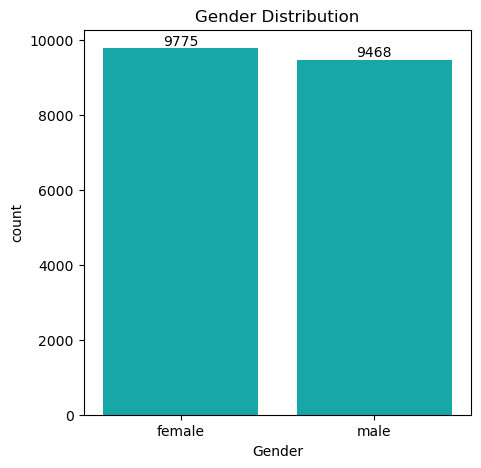

In [214]:
plt.figure(figsize=(5,5))

ax = sns.countplot(x = 'Gender' , data =df, color='c')

ax.bar_label(ax.containers[0])

plt.title("Gender Distribution")

plt.show()

In [215]:
# from the above chart we have analysed that:
# the number of females in the data is more than the males

In [216]:
# group of ParentEducation is average marks of MathScore, ReadingScore, WritingScore

gp = df.groupby('ParentEduc').agg({'MathScore' : 'mean', 'ReadingScore' : 'mean', 'WritingScore' : 'mean'})
print(gp)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


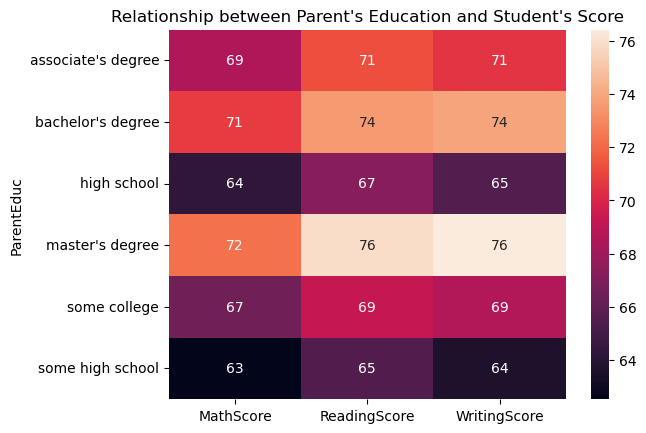

In [217]:
# using heatmap 

sns.heatmap(gp, annot = True)

plt.title("Relationship between Parent's Education and Student's Score")

plt.show()

In [218]:
# from above chart we have conclude that the education of the parents have a good impact on their student scores

In [219]:
# group of Parent Marital Status is average marks of MathScore, ReadingScore, WritingScore

gp1 = df.groupby('ParentMaritalStatus').agg({'MathScore' : 'mean', 'ReadingScore' : 'mean', 'WritingScore' : 'mean'})
print(gp1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


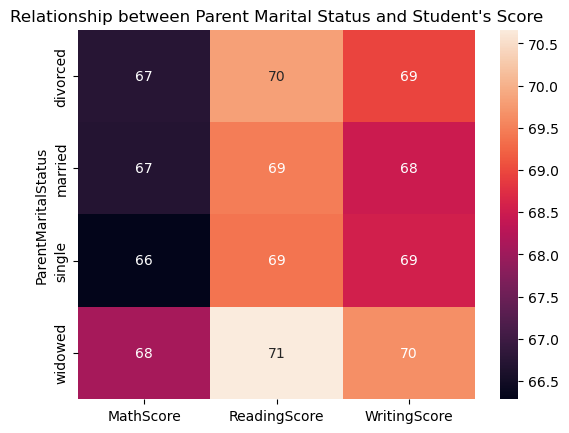

In [220]:
# using heatmap

sns.heatmap(gp1, annot = True)

plt.title("Relationship between Parent Marital Status and Student's Score")

plt.show()

In [221]:
# from the above chart we concluded that there is no/negligible impact on the 
# student score due to their parents's marital status

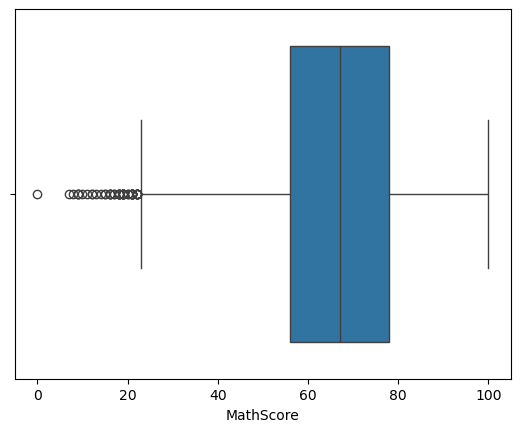

In [222]:
# outliers for MathScore

sns.boxplot(x= 'MathScore', data = df)
plt.show()

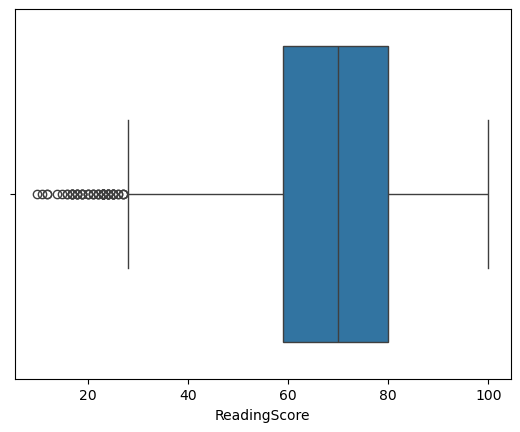

In [223]:
# outliers for ReadingScore

sns.boxplot(x= 'ReadingScore', data = df)
plt.show()

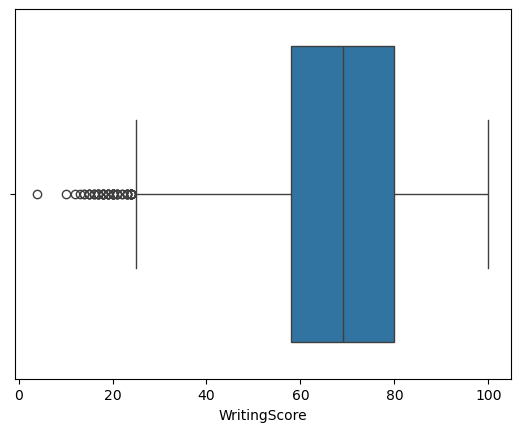

In [224]:
# outliers for WritingScore

sns.boxplot(x= 'WritingScore', data = df)
plt.show()

# Distribution of Ethnic Groups

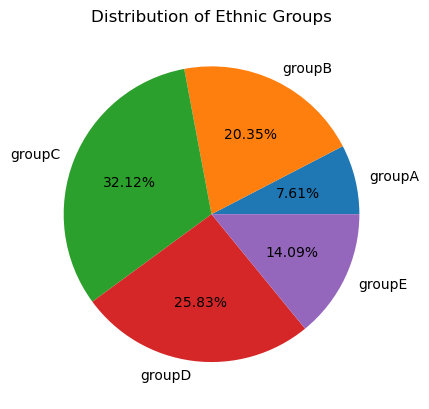

In [225]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['groupA', 'groupB', 'groupC', 'groupD', 'groupE']

mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]

plt.pie(mlist, labels = l, autopct = "%1.2f%%")

plt.title("Distribution of Ethnic Groups")

plt.show()

In [226]:
df['EthnicGroup'].unique()

array(['group B', 'group C', 'group D', 'group A', 'group E'],
      dtype=object)

In [227]:
df['EthnicGroup'].value_counts()

EthnicGroup
group C    6181
group D    4970
group B    3915
group E    2712
group A    1465
Name: count, dtype: int64

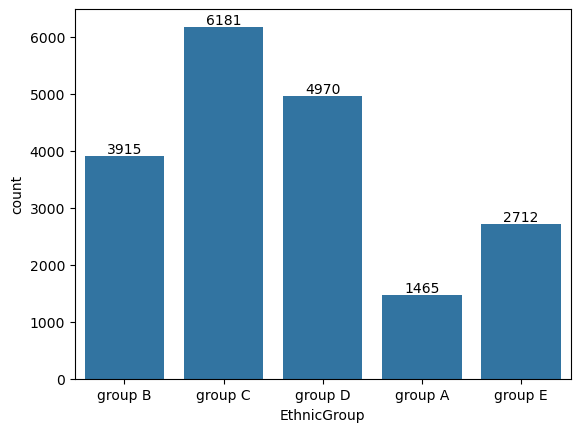

In [228]:
ax = sns.countplot(x = 'EthnicGroup', data = df)

ax.bar_label(ax.containers[0])

plt.show()